In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
import pandas as pd

# CSV dosyasını yükle
df = pd.read_csv("diabetes_data_upload.csv")  # Senin dosyan farklıysa ismini yazabilirsin

df = pd.read_csv("diabetes_data_upload.csv")  # dosya adını kendine göre değiştir
# Yes/No gibi string ifadeleri sayısala çeviriyoruz
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Male': 1, 'Female': 0})
df = df.replace({'Positive': 1, 'Negative': 0})
df.head()


<ipython-input-13-c4e265485220>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
<ipython-input-13-c4e265485220>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': 1, 'Female': 0})
<ipython-input-13-c4e265485220>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X = df.drop("class", axis=1)   # class = hedef sütun
y = df["class"]                # hedef değişken
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])  97 basari orani


from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
]) basari orani 98


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6084 - loss: 0.6636 - val_accuracy: 0.6905 - val_loss: 0.6079
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6111 - loss: 0.6529 - val_accuracy: 0.6905 - val_loss: 0.5667
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6646 - loss: 0.6013 - val_accuracy: 0.7143 - val_loss: 0.5006
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.5245 - val_accuracy: 0.8810 - val_loss: 0.4169
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8658 - loss: 0.4152 - val_accuracy: 0.8810 - val_loss: 0.3669
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8982 - loss: 0.3154 - val_accuracy: 0.9286 - val_loss: 0.2690
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.2884 - val_accuracy: 0.9286 - val_loss: 0.2289
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.2844 - val_accuracy: 0.9524 - 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9850 - loss: 0.0323
Test accuracy: 0.98
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


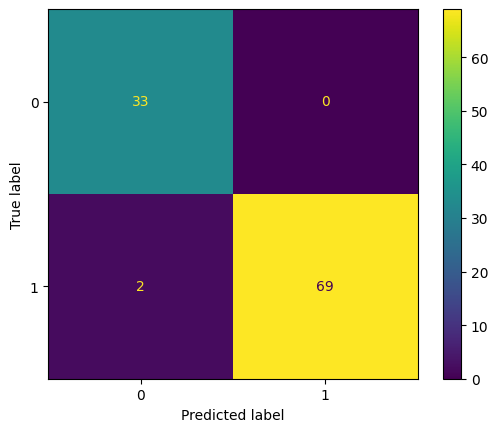

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sürekli y_pred değerlerini 0 veya 1'e çeviriyoruz
y_pred_class = (y_pred > 0.5).astype("int32")

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred_class)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


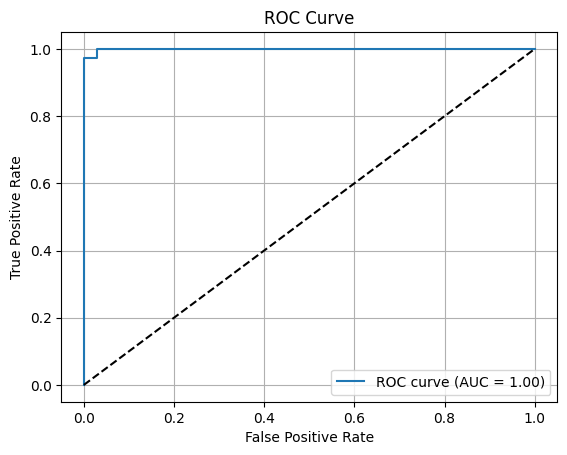

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Tahmin olasılıkları (zaten var)
y_pred_prob = model.predict(X_test)

# ROC eğrisi için FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC değeri
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_class = (y_pred > 0.6).astype("int32")
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


[[33  0]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

